In [4]:
import json
from matplotlib import pyplot as plt
import numpy as np
import os

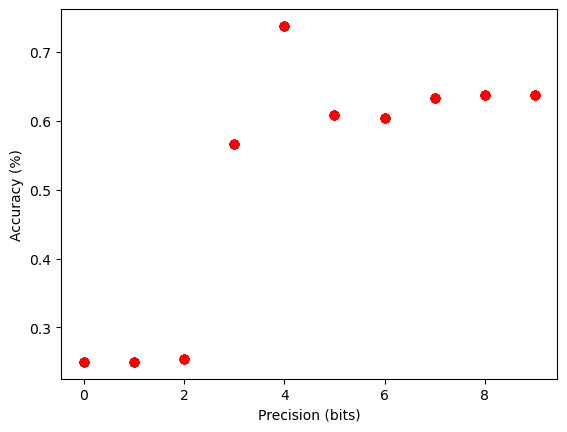

In [52]:
%matplotlib inline
def getConfig(filedir, exp):
    dir_name = 'Experiment_Data_%s/%d/'%(filedir, exp)
    filename = dir_name + 'config.json'
    with open(filename) as json_file:
        return json.load(json_file)

def loadData(filedir='CIFAR'):
    def getAccuracy(filedir):
        filename = filedir + 'metrics.json'
        with open(filename) as json_file:
            data = json.load(json_file)
        acc = data['val_accuracy']['values']
        loss = data['val_loss']['values']
        return acc, loss
        
        
    def getConfig(filedir):
        filename = filedir + 'config.json'
        with open(filename) as json_file:
            return json.load(json_file)
        
    val_acc = []
    val_loss = []
    prec = []
    shots = []
    
    dir_name = 'Experiment_Test_%s'%filedir
    
    dirs = os.listdir(dir_name)
    dirs.remove('_sources')
    for directory in dirs:
        filedir = dir_name + '/' + directory + '/'
        acc, loss = getAccuracy(filedir)
        val_acc.append(acc[0])
        val_loss.append(loss[0])
        config = getConfig(filedir)
        prec.append(config['precision'])
        shots.append(config['shots'])
    val_acc, val_loss, prec, shots = zip(*sorted(zip(val_acc, val_loss, prec, shots)))
    return np.array(val_acc), np.array(val_loss), np.array(prec), np.array(shots)

acc, loss, prec, shots = loadData()
#prec, shots, acc, loss = zip(sorted(zip(acc, loss, prec, shots)))
bits = np.log2(prec)
plt.plot(bits, acc, 'ro')
plt.xlabel('Precision (bits)')
plt.ylabel('Accuracy (%)')
plt.show()


<IPython.core.display.Javascript object>


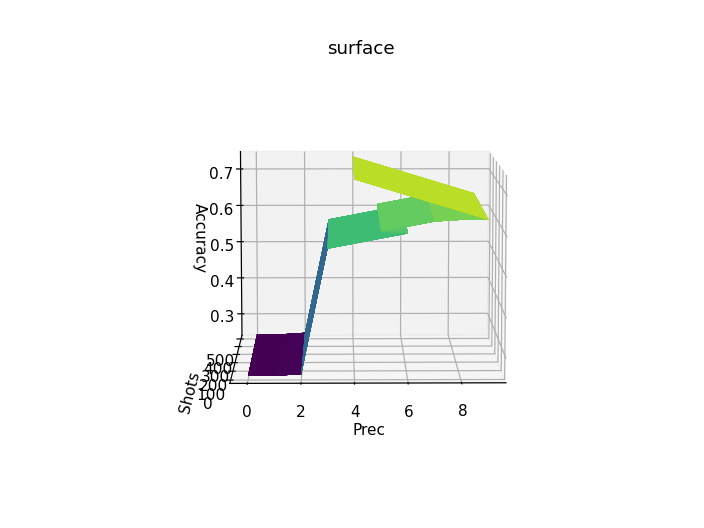

Text(0.5, 0, 'Accuracy')

In [51]:
%matplotlib notebook
X, Y = np.meshgrid(bits, shots)
Z, _ = np.meshgrid(acc, acc)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('Prec')
ax.set_ylabel('Shots')
ax.set_zlabel('Accuracy')

<IPython.core.display.Javascript object>


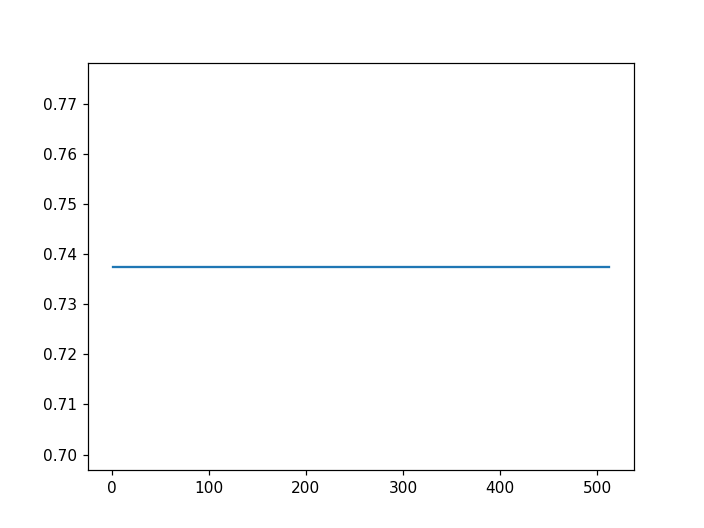

In [45]:
vals_512 = [shots[prec==16], acc[prec==16]]
plt.plot(vals_512[0], vals_512[1])